<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/Telecom_Churn_KNN_DSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Goal

  The goal of this notebook is to explore Kmeans and KNN in a DSS (Decision Support System):

  1. Create fake data to explore Kmeans 
  2. Use Telecom data to create a model for Churn of customers based on customer data
  3. Create a UI presentation for Customer Relations Personal to enter customer data and predict whether the customer will leave. 

In [136]:
# import all main libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [146]:
# create fake data for kmeans eda
data = np.random.rand(70,2)
data.shape

(70, 2)

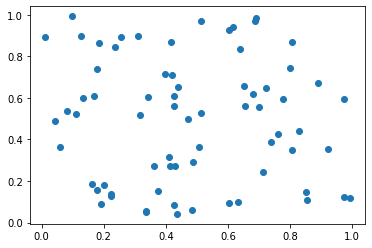

In [147]:
# Plot the fake data
plt.scatter(*zip(*data))

In [148]:
# Create a data set with 4 clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

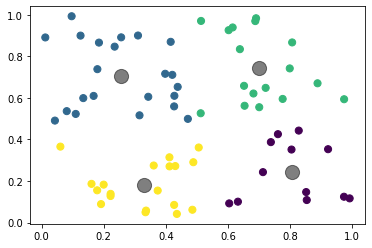

In [149]:
# Use predictions from Kmeans clustering to plt the data
y_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [152]:
# create random labels [0,1,2,3] for labelling the data and fit a model to predict the classification
y = [label % 4 for label in range(70)]
X = data
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X, y)
print(neigh.predict([[.11, .24]]))
print(neigh.predict([[0.3, 0.5]]))

[0]
[2]


# Telecom Data set from Kaggle

## Dataset includes: 

Go to: https://www.kaggle.com/mnassrib/telecom-churn-datasets to view more information on the dataset


In [153]:
import pandas as pd

df = pd.read_csv('churn-bigml-20.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

- From this we can see that no null values need to be filled 
- There are three columns with categorical data
- We also know that Area code will not not have a numerical significance 

In [155]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


- from this its clear that the scale of some of the features are much larger than others 
- example is customer service calls at 8 maximum to total night minutes of over 350
- This means without normalization some features will have more effect on classification in a 20 dimensional space. 

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


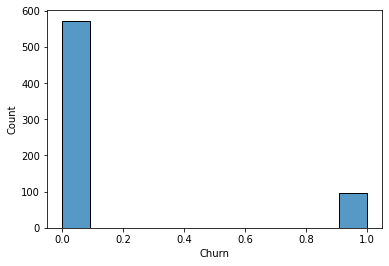

In [156]:
df.columns = ['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'No_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn']

sns.histplot(df.Churn)

- This provides that much more of the customers stay rather than leave 
- This means clustering of data of those that have stayed may be important 
- Recommendation systems, could be used for those staying to recommend services of those who are in the same clusters

In [157]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [160]:
X.State.value_counts()[:5]

AZ    19
ND    18
WA    18
NJ    18
NM    18
Name: State, dtype: int64

In [167]:
X.drop('State',axis=1, inplace=True)

- Since state has a large cardinality, we are dropping it for now
- There may be future need to use regional analysis for further breakout of how this clustering or classfying within each state might help improve both predictions and recommendations 
- Since there are a max of 20 customers per state it might be too little data to get good results per state in classification or clustering/recommendations

In [162]:
# Since international plan is categorical with low cardinality encoding is helpful
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['International_plan_enc'] = labelencoder.fit_transform(X['International_plan'])
X['Voice_mail_plan_enc'] = labelencoder.fit_transform(X['Voice_mail_plan'])
X

,State,Account_length,Area_code,International_plan,Voice_mail_plan,No_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,International_plan_enc,Voice_mail_plan_enc
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,0,0
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,0,0
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0,1
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0,1
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0,0
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0,0


In [164]:
print("International_plan_enc values")
print(X.International_plan_enc.value_counts())
X.Voice_mail_plan_enc.value_counts()
print("Voice_mail_plan_enc valueS")
print(X.Voice_mail_plan_enc.value_counts())

International_plan_enc values
0    614
1     53
Name: International_plan_enc, dtype: int64
Voice_mail_plan_enc valueS
0    478
1    189
Name: Voice_mail_plan_enc, dtype: int64


In [165]:
X.drop('International_plan', axis=1, inplace=True)
X.drop('Voice_mail_plan',axis=1, inplace=True)
X.drop('Area_code', axis=1, inplace=True)

In [168]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account_length          667 non-null    int64  
 1   No_vmail_messages       667 non-null    int64  
 2   Total_day_minutes       667 non-null    float64
 3   Total_day_calls         667 non-null    int64  
 4   Total_day_charge        667 non-null    float64
 5   Total_eve_minutes       667 non-null    float64
 6   Total_eve_calls         667 non-null    int64  
 7   Total_eve_charge        667 non-null    float64
 8   Total_night_minutes     667 non-null    float64
 9   Total_night_calls       667 non-null    int64  
 10  Total_night_charge      667 non-null    float64
 11  Total_intl_minutes      667 non-null    float64
 12  Total_intl_calls        667 non-null    int64  
 13  Total_intl_charge       667 non-null    float64
 14  Customer_service_calls  667 non-null    in

- Splitting the data is important to ensure that overfitting doesn't occur and ensure the accuracy of the training data on external data points (not used in training)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled

array([[-0.32820632, -0.58696946, -0.50990554, ..., -0.41274208,
        -0.29996591, -0.61421575],
       [-0.27856558,  2.45749264,  0.21383158, ..., -1.17133356,
        -0.29996591,  1.62809242],
       [ 0.54050663, -0.58696946,  0.77209111, ..., -1.17133356,
        -0.29996591, -0.61421575],
       ...,
       [-0.75015261, -0.58696946,  1.1303228 , ..., -1.17133356,
        -0.29996591, -0.61421575],
       [ 1.03691403,  1.00774878, -0.72266243, ..., -0.41274208,
        -0.29996591,  1.62809242],
       [ 0.24266219, -0.58696946, -0.5335452 , ..., -1.17133356,
        -0.29996591, -0.61421575]])

In [208]:
# fit a KNN model to the data:
#   Further optimization would be two use grid search to choose the optimal value for n_neighbors
# I tried 2, 3, 4, 5, and 6 -> 3 was the best scored
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [209]:
neigh.predict(X_train.iloc[6,:].to_numpy().reshape(1,-1))

array([False])

In [210]:
X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled

array([[-1.6215085 , -0.65837867,  0.93457935, ...,  0.98110713,
        -0.26832816, -0.68740634],
       [-0.26779969, -0.65837867,  1.00618833, ..., -1.18595367,
        -0.26832816, -0.68740634],
       [ 2.24962372, -0.65837867,  0.46475456, ...,  0.98110713,
        -0.26832816, -0.68740634],
       ...,
       [-0.74278524, -0.65837867, -0.1797263 , ..., -0.46360007,
        -0.26832816, -0.68740634],
       [-0.38654607, -0.65837867, -0.82420715, ..., -0.46360007,
         3.72677996, -0.68740634],
       [ 0.25468441, -0.65837867, -0.02428241, ...,  0.25875353,
        -0.26832816, -0.68740634]])

In [211]:
test_preds = neigh.predict(X_test)
score = neigh.score(X_test_scaled, y_test)
score

0.8731343283582089

- Prior to scaling this score was .86 for reference 

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


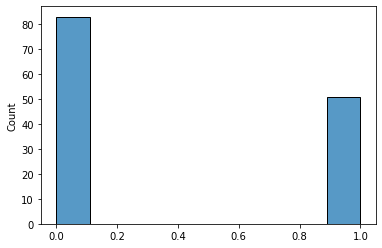

In [212]:
import seaborn as sns
sns.histplot(test_preds)


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


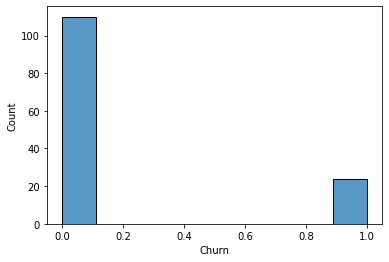

In [213]:
sns.histplot(y_test)

- One thing to note is that the predictions prior to standerdizing the model overclassified to false (it will misclassify people who are going to leave as staying) 
- This is bad as it will surprise managers when thos who were predicted to stay, leave
- The scaled prediction shows the opposite - it gives leans toward False positives, which provides more cushion for those who leave. Those who are classified to leave may need more attention anyways, 
- However, this will add to budget. More datapoints or hyper parameter tuning might help with this

# Enter the data into the Form and select to run the cell

- This will use the classifier to predict whether the customer will leave

In [233]:
#@title Account in question
#@markdown Add data about the customer your worried about.

Account_length = 60 #@param {type: "slider", min: 1, max: 250}
International_plan = "yes" #@param ["yes","no"] {allow-input: false}
Voice_mail_plan = "yes" #@param ["yes","no"] {allow-input: false}
No_vmail_messages =  60 #@param {type: "slider", min: 0, max: 60}
Total_day_minutes = 200 #@param {type: "slider", min: 0, max: 360}
Total_day_calls = 100 #@param {type: "slider", min: 0, max: 170}
Total_day_charge = 50 #@param {type: "slider", min: 0, max: 100}
Total_eve_minutes =  20 #@param {type: "slider", min: 0, max: 400}
Total_eve_calls = 10 #@param {type: "slider", min: 0, max: 200}
Total_eve_charge = 35 #@param {type: "slider", min: 0, max: 100}
Total_night_minutes = 65 #@param {type: "slider", min: 0, max: 400}
Total_night_calls = 200 #@param {type: "slider", min: 0, max: 200}
Total_night_charge = 166 #@param {type: "slider", min: 0, max: 200}
Total_intl_minutes = 400 #@param {type: "slider", min: 0, max: 400}
Total_intl_calls = 185 #@param {type: "slider", min: 0, max: 200}
Total_intl_charge = 98 #@param {type: "slider", min: 0, max: 100}
Customer_service_calls = 8 #@param {type: "slider", min: 1, max: 8}

#@markdown ---


International_plan_enc = 1 if International_plan == "yes" else 0
Voice_mail_plan_enc = 1 if Voice_mail_plan == "yes" else 0


new_data = [Account_length,No_vmail_messages, Total_day_minutes,
Total_day_calls,Total_day_charge, Total_eve_minutes,
Total_eve_calls, Total_eve_charge, Total_night_minutes,
Total_night_calls, Total_night_charge, Total_intl_minutes,
Total_intl_calls, Total_intl_charge, Customer_service_calls,
International_plan_enc, Voice_mail_plan_enc]

new_data_scaled = scaler.fit_transform(np.array(new_data).reshape(1,-1))


prediction = neigh.predict(new_data_scaled)
prob = neigh.predict_proba(new_data_scaled)
pred_vocal = f"I'm {prob[0][0] * 100}% that this customer will stay" if prediction == False else f"Do something to keep this customer. I'm {prob[0][1] * 100}% sure their leaving"
print(pred_vocal)

I'm 100.0% that this customer will stay


# Future work 
1. If connected directly to a CRM or other customer database, the model could alert the manager to a potential customer that could now be classfied as leaving. 
2. Those that are staying could be clustered for a recommendation system 
3. Those that are leaving could be clustered for recommendations for keeping them 
4. Hyper perameter and model selection optomizations could be done to further improve accuracy. 